<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/4_1_Cycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make sure we use the most updated version of statsmodels in python
!pip install statsmodels==0.12.0
import statsmodels

     |████████████████████████████████| 9.5MB 6.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import statsmodels.tsa as smt
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#Simulate ARMA process

## MA(1) process
model 1: $y_t = \epsilon_t + 0.4 \epsilon_{t-1}$

model 2: $y_t = \epsilon_t + 0.95 \epsilon_{t-1}$

In [ ]:
T = 200
e = np.random.randn(T)
ma = e[1:] + 0.4 * e[:-1]
ma1 = e[1:] + 0.95 * e[:-1]

plt.plot(ma, label = r'$\theta$ = 0.4')
plt.plot(ma1, label = r'$\theta$ = 0.95')
ax = plt.gca()
ax.set_ylabel('Moving Average Process', fontsize = 'x-large')
ax.legend(loc='upper left', fontsize = 'large')

## AR(1) process
model 1: $y_t = 0.4 y_{t-1} + \epsilon_t$

model 2: $y_t = 0.95 y_{t-1} + \epsilon_t$

In [ ]:
T = 200
e = np.random.randn(T)
ar = np.zeros(200)
ar[0] = e[0]
for i in range(T-1):
  ar[i+1] = 0.4*ar[i] + e[i+1]

ar1 = np.zeros(200)
ar1[0] = e[0]
for i in range(T-1):
  ar1[i+1] = 0.95*ar1[i] + e[i+1]

plt.plot(ar, label = '$\phi$ = 0.4')
plt.plot(ar1, label = '$\phi$ = 0.95')
ax = plt.gca()
ax.set_ylabel('Autoregressive Process', fontsize = 'x-large')
ax.legend(loc='upper left', fontsize = 'large')

## ARMA models
Alternatively, we can use the built-in functions to simulate the models.

Example model: $(1-1.1L + 0.2L^2)y_t = (1+0.3L)\epsilon_t$

In [ ]:
np.random.seed(1)
model1 = smt.arima_process.ArmaProcess(ar = [1, -1.1, 0.2], ma = [1, 0.3])
model1_data =  model1.generate_sample(200, scale = 1)

plt.plot(model1_data)

To retrieve some features of the simulated model

In [ ]:
model1.arroots

array([1.14921894, 4.35078106])

In [ ]:
model1.maroots

array([-3.33333333])

In [ ]:
model1.isinvertible

True

In [ ]:
model1.isinvertible

True

In [ ]:
acf_model = model1.acf(lags = 24)
pacf_model = model1.pacf(lags = 24)

# Example: Canadian Employment

,CAEMP,date
0,83.090255,1961-03-31
1,82.799634,1961-06-30
2,84.634438,1961-09-30
3,85.377458,1961-12-31
4,86.197605,1962-03-31
...,...,...
131,88.361801,1993-12-31
132,89.031151,1994-03-31
133,91.020295,1994-06-30
134,91.673282,1994-09-30


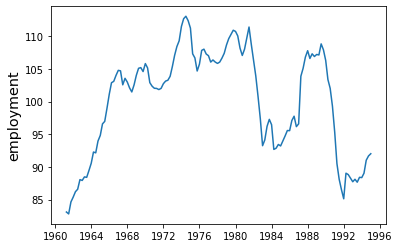

In [ ]:
caemp = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/CanadianEmployment.csv')
caemp['date'] = pd.date_range(start='1961-01-01', periods= caemp.shape[0], freq='Q')

plt.plot(caemp['date'], caemp['CAEMP'], label = 'Canadian Employment')
ax = plt.gca()
ax.set_ylabel('employment', fontsize = 'x-large')
caemp

In [ ]:
import statsmodels.tsa.stattools as tst
acf = tst.acf(caemp['CAEMP'], qstat = True)
pacf = tst.pacf(caemp['CAEMP'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1021: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


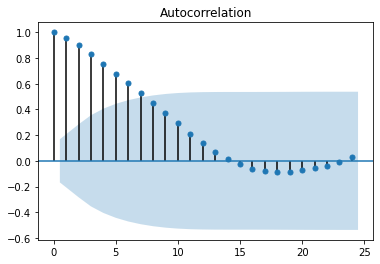

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(caemp['CAEMP'], lags=24)
plt.show()

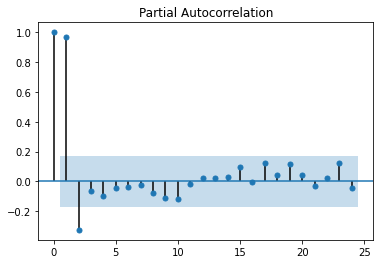

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(caemp['CAEMP'], lags=24)
plt.show()

## AR(2) model

In [ ]:
ar_model = ARIMA(caemp['CAEMP'], order=(2,0,0))
ar_results = ar_model.fit()
print(ar_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  CAEMP   No. Observations:                  136
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -242.786
Date:                Wed, 10 Mar 2021   AIC                            493.572
Time:                        16:01:56   BIC                            505.222
Sample:                             0   HQIC                           498.306
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.4779      3.734     26.103      0.000      90.159     104.797
ar.L1          1.4505      0.063     23.127      0.000       1.328       1.573
ar.L2         -0.4762      0.063     -7.606      0.0

In [ ]:
# Check AR roots to ensure model stationarity
ar_results.arroots

array([1.05442642, 1.99174381])

In [ ]:
from statsmodels.stats import diagnostic
bgtest = diagnostic.acorr_breusch_godfrey(ar_results, nlags = 12)
print('Breusch Godfrey test LM statistic: ', bgtest[0])
print('Breusch Godfrey test LM p-value: ', bgtest[1])

Breusch Godfrey test LM statistic:  2.82571106896739
Breusch Godfrey test LM p-value:  0.9966544052276602


In [ ]:
from statsmodels.stats import stattools as st
st.durbin_watson(ar_results.resid)

1.5817599131651958

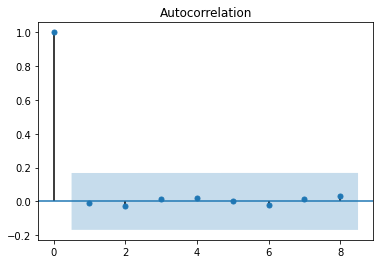

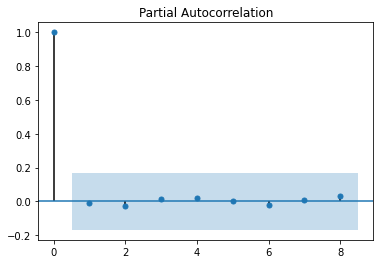

In [ ]:
# ACF and PACF of the model residuals
plot_acf(ar_results.resid, lags=8)
plot_pacf(ar_results.resid, lags=8)
plt.show()

###In-sample Forecast

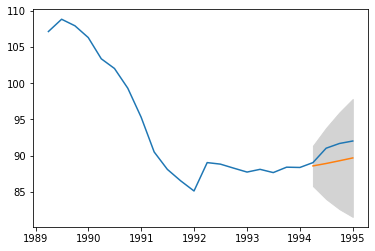

In [ ]:
# Make in-sample forecast for last 4 quarters
ar_predict = ar_results.get_prediction(start=-4, dynamic=True)
# forecast mean
mean_predict = ar_predict.predicted_mean
# get confidence interval of forecast
confidence_interval = ar_predict.conf_int()

# plotting predictions
plt.figure()
plt.plot(caemp['date'][-24:], caemp['CAEMP'][-24:], label = 'Canadian Employment')
plt.plot(caemp['date'][-4:], mean_predict.values)

# Shade confidence interval
plt.fill_between(caemp['date'][-4:], 
                 confidence_interval['lower CAEMP'], confidence_interval['upper CAEMP'], 
                 color='lightgrey')
plt.show()

###Out-of-sample Forecast

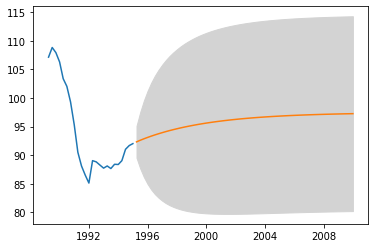

In [ ]:
# Make out-of-sample forecast for next 15 years (60 quarters)
ar_forecast = ar_results.get_forecast(60)
# forecast mean
mean_forecast = ar_forecast.predicted_mean
# get confidence interval of forecast
confidence_interval = ar_forecast.conf_int()

# plotting predictions
forecast_date = pd.date_range(start='1995-01-01', periods=60, freq='Q')
plt.figure()
plt.plot(caemp['date'][-24:], caemp['CAEMP'][-24:], label = 'Canadian Employment')
plt.plot(forecast_date, mean_forecast.values)

# Shade confidence interval
plt.fill_between(forecast_date, 
                 confidence_interval['lower CAEMP'], confidence_interval['upper CAEMP'], 
                 color='lightgrey')
plt.show()

## MA(4) model

In [ ]:
ma_model = ARIMA(caemp['CAEMP'], order=(0,0,4))
ma_results = ma_model.fit(method='innovations_mle')
print(ma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  CAEMP   No. Observations:                  136
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -283.631
Date:                Wed, 10 Mar 2021   AIC                            579.262
Time:                        16:03:31   BIC                            596.738
Sample:                             0   HQIC                           586.364
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9266      1.039     96.191      0.000      97.890     101.963
ma.L1          1.6726      0.065     25.586      0.000       1.544       1.801
ma.L2          1.7997      0.105     17.201      0.0

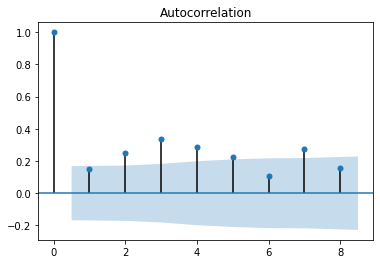

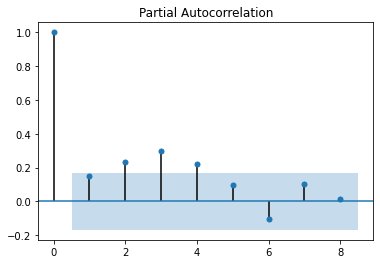

In [ ]:
# ACF and PACF of the residuals
plot_acf(ma_results.resid, lags=8)
plot_pacf(ma_results.resid, lags=8)
plt.show()

###In-sample Forecast

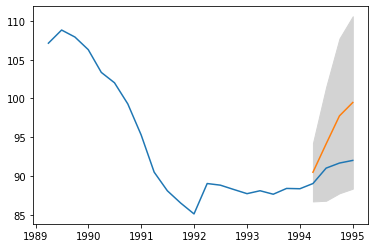

In [ ]:
# Make in-sample forecast for last 4 quarters
ma_predict = ma_results.get_prediction(start=-4, dynamic=True)
# forecast mean
mean_predict = ma_predict.predicted_mean
# get confidence interval of forecast
confidence_interval = ma_predict.conf_int()

# plotting predictions
plt.figure()
plt.plot(caemp['date'][-24:], caemp['CAEMP'][-24:], label = 'Canadian Employment')
plt.plot(caemp['date'][-4:], mean_predict.values)

# Shade confidence interval
plt.fill_between(caemp['date'][-4:], 
                 confidence_interval['lower CAEMP'], confidence_interval['upper CAEMP'], 
                 color='lightgrey')
plt.show()

###Out-of-sample Forecast

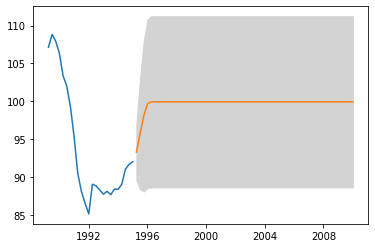

In [ ]:
# Make out-of-sample forecast for next 15 years (60 quarters)
ma_forecast = ma_results.get_forecast(60)
# forecast mean
mean_forecast = ma_forecast.predicted_mean
# get confidence interval of forecast
confidence_interval = ma_forecast.conf_int()

# plotting predictions
forecast_date = pd.date_range(start='1995-01-01', periods=60, freq='Q')
plt.figure()
plt.plot(caemp['date'][-24:], caemp['CAEMP'][-24:], label = 'Canadian Employment')
plt.plot(forecast_date, mean_forecast.values)

# Shade confidence interval
plt.fill_between(forecast_date, 
                 confidence_interval['lower CAEMP'], confidence_interval['upper CAEMP'], 
                 color='lightgrey')
plt.show()

##ARMA(3,1) Model

In [ ]:
arma_model = ARIMA(caemp['CAEMP'], order=(3,0,1))
arma_results = arma_model.fit(method='hannan_rissanen')
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  CAEMP   No. Observations:                  136
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -242.676
Date:                Wed, 10 Mar 2021   AIC                            497.352
Time:                        16:22:22   BIC                            514.828
Sample:                             0   HQIC                           504.453
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.4625      3.136     31.399      0.000      92.316     104.609
ar.L1          1.9036      0.886      2.150      0.032       0.168       3.639
ar.L2         -1.0893      1.324     -0.823      0.4

In [ ]:
arma_results.params

const     98.462494
ar.L1      1.903585
ar.L2     -1.089320
ar.L3      0.167273
ma.L1     -0.498254
sigma2     2.210891
dtype: float64

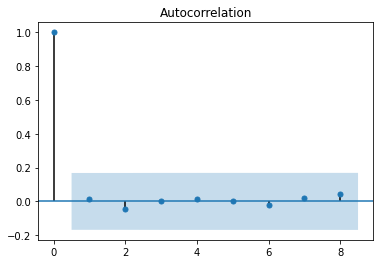

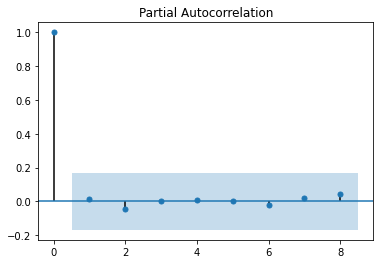

In [ ]:
# ACF and PACF of the residuals
plot_acf(arma_results.resid, lags=8)
plot_pacf(arma_results.resid, lags=8)
plt.show()

###Exercise: 
Generate in-sample and out-of-sample forecast using ARMA(3,1) model